# Nearest Neighbor Class Fidelity (cf) Metric Implementation


Implement the Nearest Neighbor Class Fidelity metric to evaluate the quality of dimensionality reduction methods. This metric quantifies how well class relationships are preserved when data is projected to lower dimensions.


- Implement a function to calculate the cfnn metric in Python
- Apply your implementation to compare at least three dimensionality reduction methods (e.g., PCA, t-SNE, UMAP, MDS) on a dataset of your choice
- Create a visualization that shows the cfnn values for different numbers of nearest neighbors (1 to nnmax)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS, TSNE
import umap

class Roulade():
    def __init__(self):
        pass
    # Roulade point generator functions
    def uniform_spiral(self, density=3, steps=100):
        x, y = [], []
        for i in range(steps):
            x.append(
                (i / steps) ** 0.5 * math.cos((i / steps) ** 0.5 * density * np.pi * 2)
            )
            y.append(
                (i / steps) ** 0.5 * math.sin((i / steps) ** 0.5 * density * np.pi * 2)
            )
        return x, y


    def uniform_roll(self, xli, yli, width=7, angle=0.25, density=5, noise_factor=0.05):
        nx, ny, nz, d = [], [], [], []
        d1 = [((x**2 + y**2) ** 0.5) for x, y in zip(xli, yli)]
        for i in range(density):
            nx.extend(
                [
                    (width + x) * math.cos(angle * i / density * np.pi * 2)
                    + (random.random() - 0.5) * noise_factor
                    for x in xli
                ]
            )
            ny.extend(
                [
                    (width + x) * math.sin(angle * i / density * np.pi * 2)
                    + (random.random() - 0.5) * noise_factor
                    for x in xli
                ]
            )
            nz.extend(yli)
            d.extend(d1)
        return nx, ny, nz, d


    def roll_generator(self,
        to_array=True, spiral_density=3, spiral_steps=20, width=7, angle=0.3, density=5
    ):
        x, y = self.uniform_spiral(density=spiral_density, steps=spiral_steps)
        x, y, z, d = self.uniform_roll(x, y, width=width, angle=angle, density=density)

        if to_array:
            return np.array([x, y, z]).T, d
        else:
            return x, y, z, d

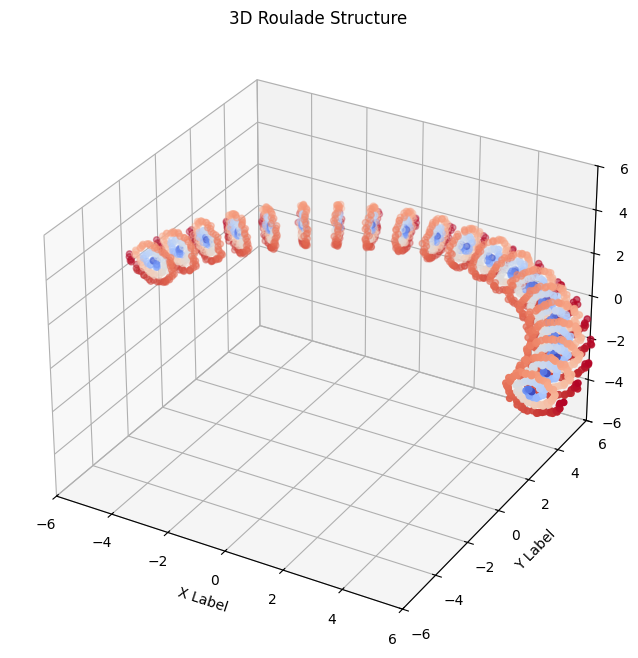

In [2]:
def plot_roulade(x, y, z, d=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(x, y, z, c=d, cmap=plt.cm.coolwarm)
    ax.set_xlabel("X Label")
    ax.set_ylabel("Y Label")
    ax.set_zlabel("Z Label")
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_zlim([-6, 6])
    plt.title("3D Roulade Structure")
    plt.show()


# Generate and visualize the roulade
xl, yl = Roulade().uniform_spiral()
x, y, z, d = Roulade().uniform_roll(xl, yl, width=7, angle=0.5, density=20, noise_factor=0.15)
plot_roulade(x, y, z, d=d)

In [3]:
def show_PCA(spiral_density=3, spiral_steps=100, width=7, angle=0.5, roll_density=20):
    fig = plt.figure(figsize=(12, 6))
    x, y, z, d = Roulade().roll_generator(to_array=False, spiral_density=spiral_density,
                           spiral_steps=spiral_steps, width=width,
                           angle=angle, density=roll_density)
 
    # Plot original 3D data
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x, y, z, c=d, cmap=plt.cm.coolwarm)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_zlim([-6, 6])
    ax.set_title('Original 3D Data')
 
    # PCA transformation
    ax2 = fig.add_subplot(122)
    points, d = Roulade().roll_generator(to_array=True, spiral_density=spiral_density,
                           spiral_steps=spiral_steps, width=width,
                           angle=angle, density=roll_density)
 
    embedding = PCA(n_components=2)
    points_transformed = embedding.fit_transform(points)
    points_transformed_t = points_transformed.T
 
    ax2.scatter(points_transformed_t[0], points_transformed_t[1], c=d, cmap=plt.cm.coolwarm)
    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')
    ax2.set_title('PCA Projection to 2D')
 
    plt.tight_layout()
    plt.show()

In [4]:
def show_KernelPCA(
    spiral_density=3,
    spiral_steps=100,
    width=7,
    angle=0.5,
    roll_density=20,
    kernel="rbf",
    gamma=15,
):
    fig = plt.figure(figsize=(12, 6))
    x, y, z, d = Roulade().roll_generator(
        to_array=False,
        spiral_density=spiral_density,
        spiral_steps=spiral_steps,
        width=width,
        angle=angle,
        density=roll_density,
    )

    # Plot original 3D data
    ax = fig.add_subplot(121, projection="3d")
    ax.scatter(x, y, z, c=d, cmap=plt.cm.coolwarm)
    ax.set_xlabel("X Label")
    ax.set_ylabel("Y Label")
    ax.set_zlabel("Z Label")
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_zlim([-6, 6])
    ax.set_title("Original 3D Data")

    # Kernel PCA transformation
    ax2 = fig.add_subplot(122)
    points, d = Roulade().roll_generator(
        to_array=True,
        spiral_density=spiral_density,
        spiral_steps=spiral_steps,
        width=width,
        angle=angle,
        density=roll_density,
    )

    embedding = KernelPCA(n_components=2, kernel=kernel, gamma=gamma)
    points_transformed = embedding.fit_transform(points)
    points_transformed_t = points_transformed.T

    ax2.scatter(
        points_transformed_t[0], points_transformed_t[1], c=d, cmap=plt.cm.coolwarm
    )
    ax2.set_xlabel("Component 1")
    ax2.set_ylabel("Component 2")
    ax2.set_title(f"Kernel PCA ({kernel}, gamma={gamma}) Projection to 2D")

    plt.tight_layout()
    plt.show()

In [5]:
def show_MDS(spiral_density=3, spiral_steps=100, width=7, angle=0.5, roll_density=20):
    fig = plt.figure(figsize=(12, 6))
    x, y, z, d = Roulade().roll_generator(
        to_array=False,
        spiral_density=spiral_density,
        spiral_steps=spiral_steps,
        width=width,
        angle=angle,
        density=roll_density,
    )

    # Plot original 3D data
    ax = fig.add_subplot(121, projection="3d")
    ax.scatter(x, y, z, c=d, cmap=plt.cm.coolwarm)
    ax.set_xlabel("X Label")
    ax.set_ylabel("Y Label")
    ax.set_zlabel("Z Label")
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_zlim([-6, 6])
    ax.set_title("Original 3D Data")

    # MDS transformation
    ax2 = fig.add_subplot(122)
    points, d = Roulade().roll_generator(
        to_array=True,
        spiral_density=spiral_density,
        spiral_steps=spiral_steps,
        width=width,
        angle=angle,
        density=roll_density,
    )

    embedding = MDS(n_components=2)
    points_transformed = embedding.fit_transform(points)
    points_transformed_t = points_transformed.T

    ax2.scatter(
        points_transformed_t[0], points_transformed_t[1], c=d, cmap=plt.cm.coolwarm
    )
    ax2.set_xlabel("Component 1")
    ax2.set_ylabel("Component 2")
    ax2.set_title("MDS Projection to 2D")

    plt.tight_layout()
    plt.show()

In [6]:
def show_tSNE(
    spiral_density=3,
    spiral_steps=100,
    width=7,
    angle=0.5,
    roll_density=20,
    metric="euclidean",
    perplexity=30,
):
    fig = plt.figure(figsize=(12, 6))
    x, y, z, d = Roulade().roll_generator(
        to_array=False,
        spiral_density=spiral_density,
        spiral_steps=spiral_steps,
        width=width,
        angle=angle,
        density=roll_density,
    )

    # Plot original 3D data
    ax = fig.add_subplot(121, projection="3d")
    ax.scatter(x, y, z, c=d, cmap=plt.cm.coolwarm)
    ax.set_xlabel("X Label")
    ax.set_ylabel("Y Label")
    ax.set_zlabel("Z Label")
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    ax.set_zlim([-6, 6])
    ax.set_title("Original 3D Data")

    # t-SNE transformation
    ax2 = fig.add_subplot(122)
    points, d = Roulade().roll_generator(
        to_array=True,
        spiral_density=spiral_density,
        spiral_steps=spiral_steps,
        width=width,
        angle=angle,
        density=roll_density,
    )

    embedding = TSNE(n_components=2, metric=metric, perplexity=perplexity)
    points_transformed = embedding.fit_transform(points)
    points_transformed_t = points_transformed.T
    points_transformed_shape = points_transformed_t.shape

    ax2.scatter(
        points_transformed_t[0], points_transformed_t[1], c=d, cmap=plt.cm.coolwarm
    )
    ax2.set_xlabel("Component 1")
    ax2.set_ylabel("Component 2")
    ax2.set_title(f"t-SNE Projection to 2D (perplexity={perplexity}, shape = {points_transformed_shape})")

    plt.tight_layout()
    plt.show()

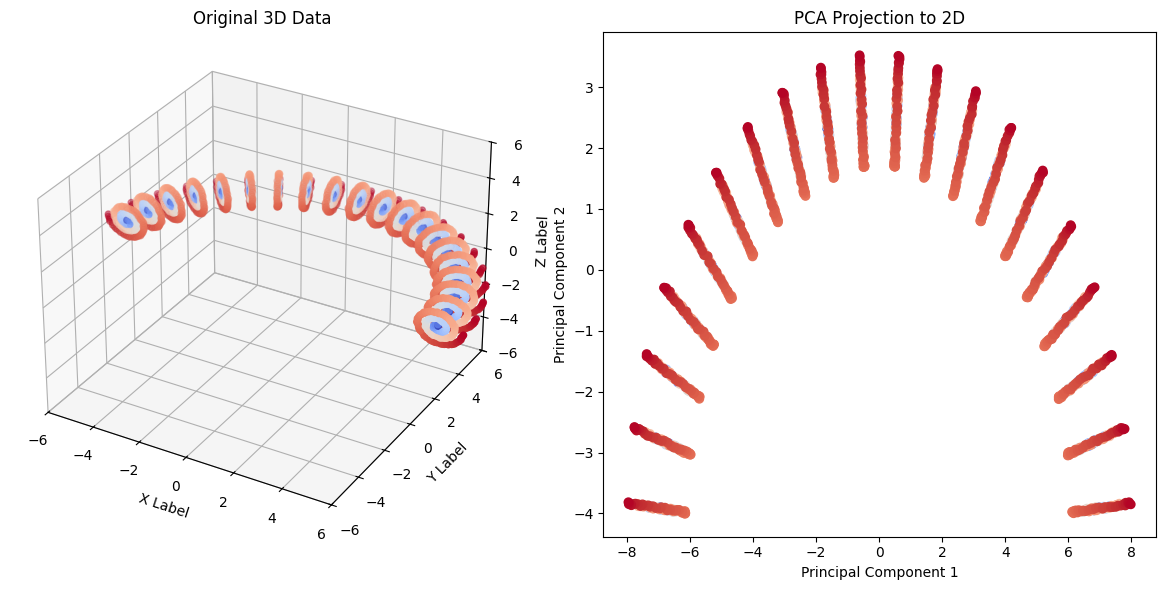

In [7]:
show_PCA()

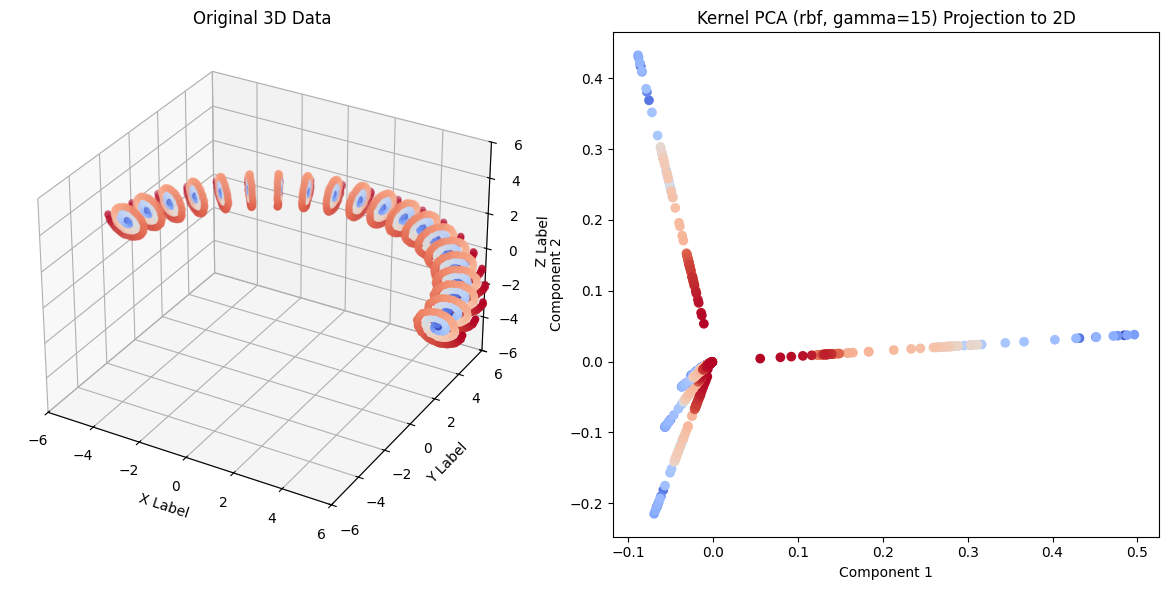

In [8]:
show_KernelPCA()

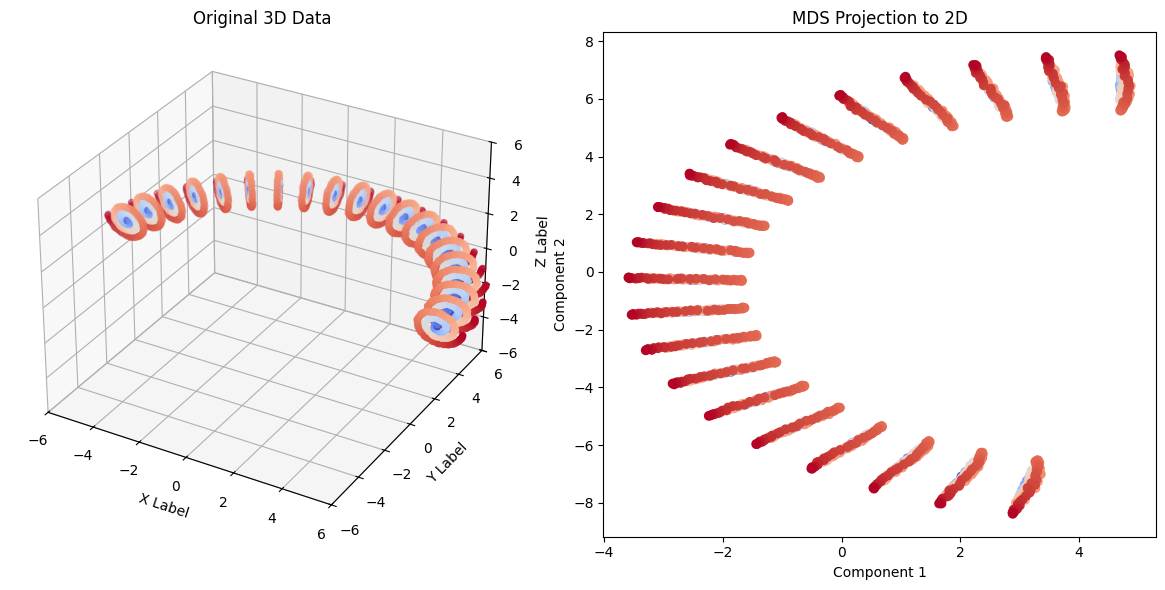

In [9]:
show_MDS()

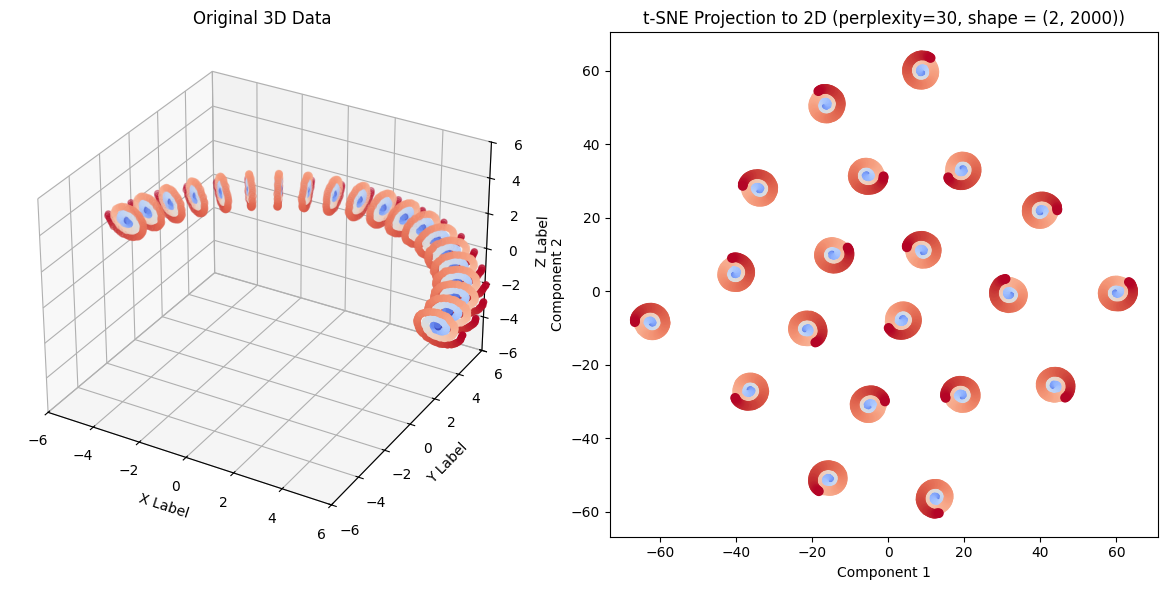

In [10]:
show_tSNE()

In [11]:
from sklearn.neighbors import NearestNeighbors

def cf_metric(X_original, Y_embedded, nmax=100):
    nbrs_orig = NearestNeighbors(n_neighbors=nmax).fit(X_original)
    _, orig_indices = nbrs_orig.kneighbors(X_original)  # Neighbors in original space
    
    nbrs_proj = NearestNeighbors(n_neighbors=nmax).fit(Y_embedded)
    _, proj_indices = nbrs_proj.kneighbors(Y_embedded)  # Neighbors in projected space
    
    cf = 0.0
    for m in range(1, nmax + 1):
        matches = 0
        for i in range(len(X_original)):
            # Compare top m neighbors in original vs projected space
            common = np.intersect1d(orig_indices[i, 1:m+1], proj_indices[i, 1:m+1])
            matches += len(common)
        cf += matches / (len(X_original) * m)
    
    return cf / nmax

In [12]:
points, d = Roulade().roll_generator(spiral_density=3, spiral_steps=100, width=7, angle=0.5, density=20)

In [13]:
embedding = TSNE(n_components=2, perplexity=30, metric='euclidean')
roll_transformed = embedding.fit_transform(points)
tsne_cf = cf_metric(points, roll_transformed)

In [14]:
embedding = PCA(n_components=2)
roll_transformed = embedding.fit_transform(points)
pca_cf = cf_metric(points, roll_transformed)

In [15]:
embedding = KernelPCA(n_components=2, kernel='rbf', gamma=15)
roll_transformed = embedding.fit_transform(points)
kernel_pca_cf = cf_metric(points, roll_transformed)

In [16]:
embedding = MDS(n_components=2)
roll_transformed = embedding.fit_transform(points)
mds_cf = cf_metric(points, roll_transformed)

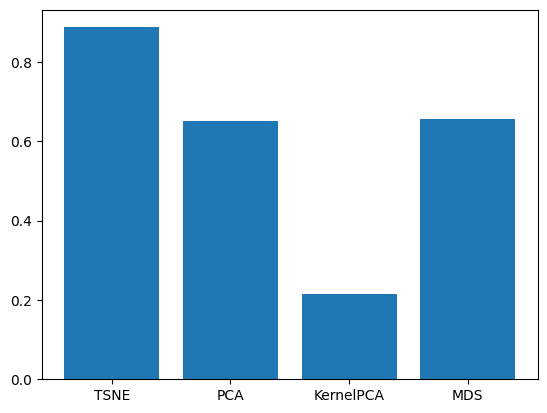

In [17]:
fidelities = {
    "TSNE":tsne_cf,
    "PCA":pca_cf,
    "KernelPCA": kernel_pca_cf,
    "MDS": mds_cf
}

plt.bar(x=list(fidelities.keys()), height=list(fidelities.values()))
plt.show()

In [18]:
def run_cf(max_nn=100):
    results = {
        "TSNE":[],
        "PCA":[],
        "KernelPCA": [],
        "MDS": []
    }

    for method in results.keys():
        for n_neighbors in range(2,max_nn+1):
            if method == "TSNE":
                embedding = TSNE(n_components=2, perplexity=30, metric='euclidean')
                roll_transformed = embedding.fit_transform(points)
                results[method].append(cf_metric(points, roll_transformed, nmax=n_neighbors))
            elif method == "PCA":
                embedding = PCA(n_components=2)
                roll_transformed = embedding.fit_transform(points)
                results[method].append(cf_metric(points, roll_transformed, nmax=n_neighbors))
            elif method == 'KernelPCA':
                embedding = KernelPCA(n_components=2, kernel='rbf', gamma=15)
                roll_transformed = embedding.fit_transform(points)
                results[method].append(cf_metric(points, roll_transformed, nmax=n_neighbors))
            else:
                embedding = MDS(n_components=2)
                roll_transformed = embedding.fit_transform(points)
                results["MDS"].append(cf_metric(points, roll_transformed, nmax=n_neighbors))

    plt.plot(results["TSNE"])
    plt.plot(results["PCA"])
    plt.plot(results["KernelPCA"])
    plt.plot(results["MDS"])
    plt.legend(["TSNE", "PCA", "KernelPCA", "MDS"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("Class Fidelity")
    plt.show()

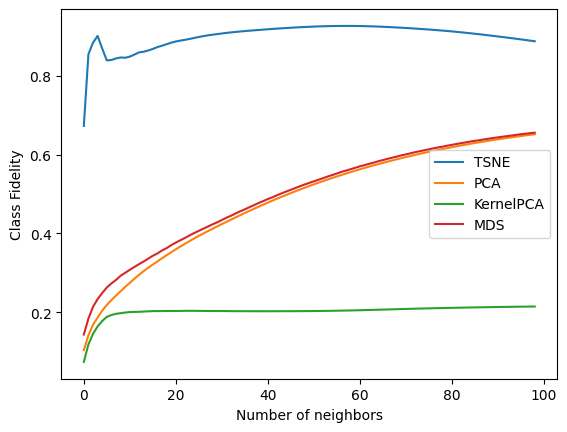

In [21]:
run_cf()

## Performance comparison of different methods based on nearest neighbor class fidelity metric

Based on the nearest neighbor class fidelity metric, **t-SNE** demonstrates the best preservation of local structure among all tested dimensionality reduction methods. <br>
It consistently achieves the highest class fidelity across nearly all neighborhood sizes, peaking above 0.9 for small neighborhoods and maintaining strong performance as the neighborhood size increases. <br>
This confirms t-SNE's strength in capturing local relationships in high-dimensional data.

In contrast, **PCA** and **MDS** show similar, moderate performance. Their fidelity values start low and gradually increase with the number of neighbors, <br>
indicating they capture more global rather than local structure. Their curves closely follow each other, suggesting comparable behavior in how they embed the data.

**KernelPCA** underperforms relative to the others, maintaining a much lower and flatter fidelity curve. <br>
This implies it fails to preserve meaningful neighborhood relationships in the embedding space, at least with the current RBF kernel and parameter settings (`gamma=15`).

Overall, for tasks prioritizing local neighborhood structure like clustering, **t-SNE** is clearly the superior choice. <br>
PCA and MDS are more suitable for global structure preservation, while KernelPCA may require tuning or alternative kernels to be competitive.